# Assignment 9 - Clustering

- Allan Simonsen
- Jean-Poul Leth-Møller
- Nina Lisakowski


## Import of libraries

In [1]:
#The following libraries and modules are needed.

# import pandas for structuring the data
import pandas as pd

#numpy for splitting the data
import numpy as np

import joblib

from sklearn.cluster import  MeanShift, estimate_bandwidth

from sklearn import metrics
import matplotlib.pyplot as plt


from scipy.spatial.distance import cdist

from sklearn.decomposition import PCA

### Data preperation

In [2]:
freedom_dataset = pd.read_csv('freedom.csv', delimiter=",")

In [3]:
freedom_dataset.head()

,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,4.5,6.5,6.5,6.5,6.5,6.0,7.0,7.0,7.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.5,5.5
1,Albania,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,Algeria,6.0,6.0,6.0,6.5,6.0,6.0,6.0,6.0,6.0,...,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5
3,Andorra,3.5,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Angola,NaN,NaN,NaN,6.0,6.0,7.0,7.0,7.0,7.0,...,5.5,5.5,5.5,5.5,5.5,5.5,6.0,6.0,6.0,5.5


In [6]:
freedom_dataset.shape

(193, 48)

In [4]:
freedom_dataset.describe()

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,142.000000,143.000000,145.000000,151.000000,152.000000,148.000000,151.000000,154.000000,155.000000,157.000000,...,192.000000,192.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,4.299296,4.318182,4.320690,4.396026,4.413158,4.380405,4.317881,4.227273,4.261290,4.251592,...,3.309896,3.307292,3.310881,3.316062,3.297927,3.331606,3.349741,3.383420,3.391192,3.422280
std,2.008016,2.014512,1.985779,1.973757,2.005941,1.999784,2.005396,2.012291,2.009988,2.041731,...,1.971407,1.977451,1.972925,1.979347,1.978556,2.013337,2.020910,2.033735,2.035767,2.031438
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.250000,2.000000,2.500000,2.000000,...,1.500000,1.375000,1.500000,1.500000,1.000000,1.500000,1.500000,1.500000,1.500000,1.500000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.750000,5.000000,5.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.500000,5.500000,5.500000,5.500000,5.500000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [5]:
freedom_dataset.columns

Index(['country', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018'],
      dtype='object')

In [10]:
freedom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  193 non-null    object 
 1   1972     142 non-null    float64
 2   1973     143 non-null    float64
 3   1974     145 non-null    float64
 4   1975     151 non-null    float64
 5   1976     152 non-null    float64
 6   1977     148 non-null    float64
 7   1978     151 non-null    float64
 8   1979     154 non-null    float64
 9   1980     155 non-null    float64
 10  1981     157 non-null    float64
 11  1982     0 non-null      float64
 12  1983     158 non-null    float64
 13  1984     159 non-null    float64
 14  1985     159 non-null    float64
 15  1986     159 non-null    float64
 16  1987     159 non-null    float64
 17  1988     159 non-null    float64
 18  1989     160 non-null    float64
 19  1990     160 non-null    float64
 20  1991     179 non-null    float64
 21  1992     183 non

In [6]:
#We clean up NAN fields with the mean value for each row
freedom_dataset = freedom_dataset.where(freedom_dataset.notna(), freedom_dataset.mean(axis=1, numeric_only=True), axis=0)
freedom_dataset

,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,4.500000,6.500000,6.500000,6.5,6.5,6.000000,7.000000,7.000000,7.000000,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.5,5.5
1,Albania,7.000000,7.000000,7.000000,7.0,7.0,7.000000,7.000000,7.000000,7.000000,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,Algeria,6.000000,6.000000,6.000000,6.5,6.0,6.000000,6.000000,6.000000,6.000000,...,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5
3,Andorra,3.500000,4.000000,4.000000,4.0,4.0,1.483871,1.483871,1.483871,1.483871,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Angola,6.162791,6.162791,6.162791,6.0,6.0,7.000000,7.000000,7.000000,7.000000,...,5.5,5.5,5.5,5.5,5.5,5.5,6.0,6.0,6.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,2.000000,2.000000,2.000000,2.0,1.5,1.500000,1.500000,1.500000,1.500000,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,5.5,5.5,6.5
189,Vietnam,6.000000,6.000000,6.000000,7.0,7.0,7.000000,7.000000,7.000000,7.000000,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
190,Yemen,5.500000,6.000000,6.000000,6.3,6.3,6.300000,6.000000,6.000000,6.000000,...,5.5,5.5,6.0,6.0,6.0,6.0,6.5,6.5,6.5,6.5
191,Zambia,5.000000,5.000000,4.500000,5.0,5.0,5.000000,5.000000,5.000000,5.500000,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,4.0,4.0,4.0


We isolate the numeric values and discard countries.

In [7]:
X = freedom_dataset.iloc[:, 1:].values
X

array([[4.5, 6.5, 6.5, ..., 6. , 5.5, 5.5],
       [7. , 7. , 7. , ..., 3. , 3. , 3. ],
       [6. , 6. , 6. , ..., 5.5, 5.5, 5.5],
       ...,
       [5.5, 6. , 6. , ..., 6.5, 6.5, 6.5],
       [5. , 5. , 4.5, ..., 4. , 4. , 4. ],
       [5.5, 5.5, 5.5, ..., 5. , 5.5, 5. ]])

We run PCA to compress the 47 columns down to 2

In [8]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X

array([[ 1.85489999e+01, -1.34059214e-02],
       [ 7.42035683e+00,  1.00108032e+01],
       [ 1.40080383e+01, -8.68436020e-01],
       [-1.50235433e+01,  1.46033259e+00],
       [ 1.71836870e+01,  1.34829179e+00],
       [-7.26460364e+00, -2.31840275e+00],
       [-6.89317696e+00,  2.26752315e+00],
       [ 4.68242600e+00, -2.09651828e+00],
       [-1.81949172e+01, -2.32986639e+00],
       [-1.81949172e+01, -2.32986639e+00],
       [ 1.36278586e+01, -1.98050011e+00],
       [-1.52088041e+01, -1.10164080e-01],
       [ 1.28522223e+01, -4.57627289e+00],
       [ 2.13465417e+00,  6.33318626e-01],
       [-1.80436223e+01, -2.13817468e+00],
       [ 1.55821901e+01, -2.45698688e+00],
       [-1.77414372e+01, -2.66570847e+00],
       [-1.59742027e+01, -2.43046362e+00],
       [ 1.43712960e+00,  1.28806098e+01],
       [ 9.95743722e+00, -3.64185828e+00],
       [-3.69606881e+00,  1.63772461e+00],
       [ 3.76509210e+00, -1.54703843e+00],
       [-9.51930473e+00, -1.42619997e+00],
       [-5.

In [9]:
pca.n_components_

2

### Training the model

We run the meanshift algorithm

In [10]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=300)
bandwidth

6.340377417399514

In [11]:
msmodel = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msmodel.fit(X)
labels = msmodel.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
n_clusters_

5

In [12]:
cluster_centers = msmodel.cluster_centers_
cluster_centers

array([[-16.03391188,  -1.35580381],
       [ 15.94939529,  -1.32826758],
       [  5.95832706,  -0.09297636],
       [ -4.40158355,  -1.00133728],
       [ -2.13511776,  10.80577311]])

In [13]:
Y = msmodel.predict(X)
Y

array([1, 4, 1, 0, 1, 3, 3, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 4, 2, 3, 2,
       3, 3, 1, 4, 2, 1, 1, 1, 0, 4, 1, 1, 4, 1, 3, 2, 1, 1, 0, 1, 3, 1,
       0, 0, 0, 1, 0, 3, 3, 1, 3, 1, 1, 0, 1, 1, 3, 0, 0, 2, 2, 3, 4, 4,
       0, 0, 2, 1, 2, 3, 1, 3, 4, 0, 3, 2, 1, 1, 0, 0, 0, 3, 0, 2, 1, 2,
       0, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 4, 0, 0, 1, 0, 3,
       0, 3, 0, 4, 3, 2, 2, 1, 3, 0, 2, 0, 0, 2, 2, 2, 1, 3, 0, 1, 2, 0,
       4, 3, 2, 3, 3, 4, 0, 1, 4, 2, 1, 3, 0, 4, 1, 3, 3, 2, 2, 2, 0, 0,
       3, 1, 4, 4, 1, 0, 3, 0, 0, 0, 1, 3, 0, 0, 1, 1, 2, 2, 3, 1, 3, 0,
       2, 3, 1, 0, 2, 3, 1, 0, 0, 4, 1, 3, 3, 1, 1, 2, 1])

plotting the clusters in 2D and 3D space

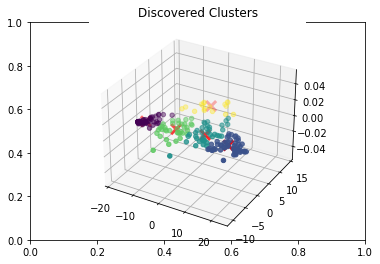

In [14]:
fig = plt.figure()
plt.title('Discovered Clusters')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],  marker='o', cmap='viridis', c=labels)
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', 
           color='red', s=100, linewidth=3, zorder=10)
plt.show()

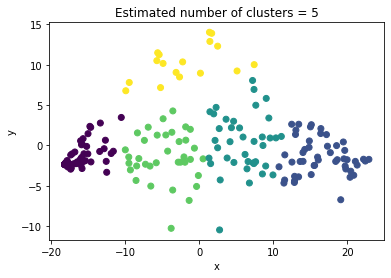

In [15]:
plt.scatter(X[:,0], X[:,1], c=labels, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Sacving the PCA and MeanShift model in pkl files

In [16]:
joblib.dump(msmodel, 'msmodel.pkl')

['msmodel.pkl']

In [17]:
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

### Deploying the model

In [18]:
%%writefile mswebapp.py

# Import libraries
import numpy as np

# from sklearn.externals 
import joblib
import pickle
from flask import Flask, request, jsonify, render_template

# create an instance (our app)
app = Flask(__name__)
# app = Flask(__name__, template_folder='somefolder')

msmodel = joblib.load('msmodel.pkl')
pca = joblib.load('pca.pkl')

@app.route('/', methods=['GET', 'POST'])

@app.route('/hi/<name>')
def hello(name = None):
    return render_template('start.html', name=name)
# name is parameter in the template: {{name}}

@app.route('/predict')
def predict():
    return render_template('prediction.html')

@app.route('/predicted', methods=['GET', 'POST'])
def predicted():
    if request.method == 'POST':
        x1972 = request.form['x1']
        x1973 = request.form['x2']
        x1974 = request.form['x3']
        x1975 = request.form['x4']
        x1976 = request.form['x5']
        x1977 = request.form['x6']
        x1978 = request.form['x7']
        x1979 = request.form['x8']
        x1980 = request.form['x9']
        x1981 = request.form['x10']
        x1982 = request.form['x11']
        x1983 = request.form['x12']
        x1984 = request.form['x13']
        x1985 = request.form['x14']
        x1986 = request.form['x15']
        x1987 = request.form['x16']
        x1988 = request.form['x17']
        x1989 = request.form['x18']
        x1990 = request.form['x19']
        x1991 = request.form['x20']
        x1992 = request.form['x21']
        x1993 = request.form['x22']
        x1994 = request.form['x23']
        x1995 = request.form['x24']
        x1996 = request.form['x25']
        x1997 = request.form['x26']
        x1998 = request.form['x27']
        x1999 = request.form['x28']
        x2000 = request.form['x29']
        x2001 = request.form['x30']
        x2002 = request.form['x31']
        x2003 = request.form['x32']
        x2004 = request.form['x33']
        x2005 = request.form['x34']
        x2006 = request.form['x35']
        x2007 = request.form['x36']
        x2008 = request.form['x37']
        x2009 = request.form['x38']
        x2010 = request.form['x39']
        x2011 = request.form['x40']
        x2012 = request.form['x41']
        x2013 = request.form['x42']
        x2014 = request.form['x43']
        x2015 = request.form['x44']
        x2016 = request.form['x45']
        x2017 = request.form['x46']
        x2018 = request.form['x47']
        
        X = [[x1972, x1973, x1974, x1975, x1976, x1977, x1978, x1979, x1980, x1981, x1982, x1983, x1984, x1985, x1986, x1987, x1988, x1989, x1990, x1991, x1992, x1993,x1994, x1995, x1996, x1997, x1998, x1999, x2000, x2001, x2002, x2003, x2004, x2005, x2006, x2007, x2008,x2009, x2010, x2011, x2012, x2013, x2014, x2015, x2016, x2017, x2018]]
        newX = pca.transform(X)
        predicted = msmodel.predict(newX)
          
        return render_template("predicted.html", content=X, prediction=predicted)
    
@app.route('/bye')
def bye():
    return render_template('bye.html')

if __name__ == '__main__':
    app.run(debug=True)

Overwriting mswebapp.py


In [200]:
# Run the server
!python mswebapp.py

^C
